# 5 nM FITC-labeled ds60mer (3/28) and dsRed-p40

In [ ]:
arp23_max_concentration = 0.118 / 72000 * 1e6 * 69 / 70
print(arp23_max_concentration)

In [2]:
from numpy import array, logspace

In [3]:
anisotropy_row = array([0.284,
                       0.238,
                       0.187,
                       0.124,
                       0.096,
                       0.085,
                       0.073,
                       0.069,
                       0.066,
                       0.064,
                       0.058,
                       0.060,
                       0.059])
no_points = len(anisotropy_row)
arp23_concentration_row = arp23_max_concentration * logspace(0, -(no_points - 1), num = no_points, base = 2)

In [4]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [11]:
from scipy.optimize import curve_fit
from numpy import sqrt, linspace

In [6]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.005 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.005)**2 - 
                                            4 * arp23_concentration * 0.005)) / 0.005
    return anisotropy

In [7]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.05, 0.1])

/home/jiongyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


Text(0.5, 0, 'TagRFP-p40 complex ($\\mu$M)')

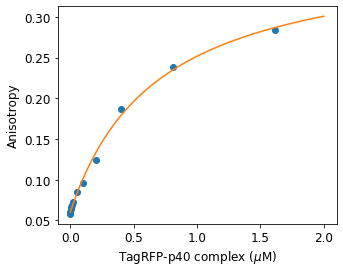

In [13]:
figure_handle, axes_handle = subplots()
figure_handle.set_figwidth(5)
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
x_row = linspace(0, 2, 100)
axes_handle.plot(x_row, dna_anisotropy(x_row, *p2opt))
axes_handle.tick_params(labelsize = 12)
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'TagRFP-p40 ($\mu$M)', fontsize = 12)

In [9]:
from numpy import diag
print(p2opt)
print(sqrt(diag(p2cov)))

[0.68702495 0.06027298 0.3834893 ]
[0.07299015 0.00184928 0.01475809]
